In [1]:
import pandas as pd

from Driver.driver import compute_alpha_with_markov_strat_for_ticker, retrieve_and_add_markov, compute_alpha_with_markov_strat_for_list_tickers, retrieve_data_and_add_features, assign_states_and_calculate_transition_probabilities
from Scrapers.yf_scraper import YFScraper
from Markov_State_Determiners.Czech_State_Determiner import CzechStateDeterminer
from Transition_Probability_Calculation.Empirical_Calculator import EmpiricalCalculator
from Transition_Probability_Calculation.Contour_Empirical_Calculator import ContourEmpiricalCalculator
from Basic_Feature_Selection.feature_addition import add_basic_technical_analysis_vars
from Markov_Strategies.Czech_State_Determiner.Czech_Strategy1 import CzechStrategy1
"""
REPORT INDICES:
Avg Alpha
Adj Alpha
M_P
BH_P
Ind Removed
Avg. Markov_R/MU_T
Percentile (Against Random)
Avg. BuyHold_R/MU_T
M/BH DTs
markov_dts
buy_hold_dts
Random Mean
Random Standard Deviation
macro_t_units


For the analytics, the indices are listed as follows:
State Combo
Avg Return %
Profitable %
Over B %
STD
Num Instances
Returns
"""

'\nREPORT INDICES:\nAvg Alpha\nAdj Alpha\nM_P\nBH_P\nInd Removed\nAvg. Markov_R/MU_T\nPercentile (Against Random)\nAvg. BuyHold_R/MU_T\nM/BH DTs\nmarkov_dts\nbuy_hold_dts\nRandom Mean\nRandom Standard Deviation\nmacro_t_units\n\n\nFor the analytics, the indices are listed as follows:\nState Combo\nAvg Return %\nProfitable %\nOver B %\nSTD\nNum Instances\nReturns\n'

In [2]:
from Markov_Analytics.State_Determiner_Value_Report import generate_value_report_from_scratch
from Scrapers.yf_scraper import YFScraper

ticker = 'SPY'
scraper = YFScraper()
czech_state_determiner_return = CzechStateDeterminer(k=1, l=20)

data, raw_report = generate_value_report_from_scratch(ticker, czech_state_determiner_return, scraper, start='2010-01-01', end='2024-01-01', transition_probability_calculator=None,test_against_random=False, N=100, value_report_prefix='State_Determiner_Value_Reports', sd_name='Czech_Return')

Generating Value Report on State Space . . .


/Users/jeremylevitt/IdeaProjects/Markov_Structured/venv/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


Assigning states . . .
Calculating transition probabilities . . .
Beginning backtest . . .
Generating report . . .
Generated report!
Combined figures saved as State_Determiner_Value_Reports/Czech_Return/Czech_Return_graphs.pdf


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,daily_return,volume_change,STD_L=20,SMA_20,...,CMF_20,CCI_20,volume_oscillator,force_index,on_balance_volume,aroon_oscillator,volume_price_trend,ultimate_oscillator,state,state_nominal
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-02,109.260002,110.589996,108.879997,110.379997,84.599075,216327900,0.012103,0.151507,0.010585,-0.001264,...,-0.036413,-64.101123,NaN,-1.482283e+08,-130683200,NaN,-1.562834e+07,NaN,g2,0.50
2010-02-03,109.879997,110.480003,109.510002,109.830002,84.177528,172730700,-0.004983,-0.201533,0.010574,-0.001646,...,-0.074573,-57.690335,NaN,-1.582955e+08,-303413900,NaN,-1.648901e+07,NaN,d1,-0.25
2010-02-04,108.980003,109.029999,106.419998,106.440002,81.579323,356715700,-0.030866,1.065155,0.012403,-0.003224,...,-0.152196,-117.760341,NaN,-2.302509e+08,-660129600,NaN,-2.749935e+07,NaN,d3,-0.75
2010-02-05,106.559998,106.879997,104.580002,106.660004,81.747925,493585800,0.002067,0.383695,0.012344,-0.003332,...,-0.075922,-134.488895,NaN,-2.370998e+08,-166543800,NaN,-2.647916e+07,NaN,g1,0.25
2010-02-08,106.739998,107.330002,105.809998,105.889999,81.157768,224166900,-0.007219,-0.545840,0.012270,-0.003860,...,-0.140367,-115.802347,NaN,-2.308933e+08,-390710700,NaN,-2.809747e+07,NaN,d1,-0.25


In [4]:
from temp.Distribution_U.UniversalFitter import fit_distributions_all_hp_combinations
state_filtered_data_pdfs = {}
for state in data['state'].unique():
    state_filtered_data_pdfs[state] = fit_distributions_all_hp_combinations(data[data['state'] == state], 'Standard_Log_Gauss')[0]


True
PDF set successfully.
(m, std, r)
True
PDF set successfully.
(m, std, r)
Mean: 0.012635561191143115
Std: 0.008336427352804085
validating PDF ...
validating PDF ...
True
PDF set successfully.
(m, std, r)
True
PDF set successfully.
(m, std, r)
Mean: -0.003947674754544128
Std: 0.004345255111113309
validating PDF ...
validating PDF ...
True
PDF set successfully.
(m, std, r)
True
PDF set successfully.
(m, std, r)
Mean: -0.022537069390576814
Std: 0.01599221482423439
validating PDF ...
validating PDF ...
True
PDF set successfully.
(m, std, r)
True
PDF set successfully.
(m, std, r)
Mean: 0.004169243197072098
Std: 0.004222723314801626
validating PDF ...
validating PDF ...
True
PDF set successfully.
(m, std, r)
True
PDF set successfully.
(m, std, r)
Mean: -0.013604085010790608
Std: 0.007786595547031914
validating PDF ...
validating PDF ...
True
PDF set successfully.
(m, std, r)
True
PDF set successfully.
(m, std, r)
Mean: 0.017431108036845906
Std: 0.01029560274986367
validating PDF ...
vali

/Users/jeremylevitt/IdeaProjects/Markov_Structured/temp/Distribution_U/Distribution_Fitters/Standard_Log_Gauss_Distribution_Fitter.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['log_return'] = np.log(filtered_data[return_col] + 1)
/Users/jeremylevitt/IdeaProjects/Markov_Structured/temp/Distribution_U/Distribution_Fitters/Standard_Log_Gauss_Distribution_Fitter.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['log_return'] = np.log(filtered_data[return_col] + 1)
/Users/j

In [5]:
state_filtered_data_pdfs

{'g2': {'distribution_name': 'Standard_Log_Gauss',
  'distribution': <temp.Distribution_U.Distributions.Standard_Log_Gauss_Distribution.Standard_Log_Gauss_Distribution at 0x11ece4910>,
  'hp_map': {},
  'fitted_var_map': {'mean': 0.012635561191143115,
   'std': 0.008336427352804085},
  'pdf_param_names': ['daily_return']},
 'd1': {'distribution_name': 'Standard_Log_Gauss',
  'distribution': <temp.Distribution_U.Distributions.Standard_Log_Gauss_Distribution.Standard_Log_Gauss_Distribution at 0x11ece6050>,
  'hp_map': {},
  'fitted_var_map': {'mean': -0.003947674754544128,
   'std': 0.004345255111113309},
  'pdf_param_names': ['daily_return']},
 'd3': {'distribution_name': 'Standard_Log_Gauss',
  'distribution': <temp.Distribution_U.Distributions.Standard_Log_Gauss_Distribution.Standard_Log_Gauss_Distribution at 0x11ece7a60>,
  'hp_map': {},
  'fitted_var_map': {'mean': -0.022537069390576814,
   'std': 0.01599221482423439},
  'pdf_param_names': ['daily_return']},
 'g1': {'distribution_na

In [6]:
import numpy as np
tpm = raw_report['Transition Probability Matrix']
def combined_distribution_given_state(curr_state, possible_states, distribution_map_by_state, tpm: pd.DataFrame):
    def combined_dist_return_pdf(r):
        toReturn = 0
        for next_state in possible_states:
            """
             TPM ONLY BEING USED FOR 1D CASE. WE SHOULD ABSTRACT AWAY TO "PROBABILITY IN X STATE".
            """
            if next_state not in tpm[curr_state].index:
                p = 0
            else:
                p = tpm[curr_state][next_state]
            toReturn += p * distribution_map_by_state[next_state]['distribution'].return_pdf(r)
        return toReturn
    return combined_dist_return_pdf



In [47]:
from scipy.optimize import root
from scipy.integrate import quad
import numpy as np

RETURN_LOWER_BOUND = -1

def get_optimal_bet_next_unit(return_pdf, maximum_return=10, maxfev=3000):
    """
    Finds the optimal Kelly bet fraction S given a return PDF.

    Parameters:
    - return_pdf: The probability density function of returns.
    - maximum_return: The upper limit for integration (default is 10).

    Returns:
    - solution: The solution object from scipy.optimize.root containing the optimal S.
    """
    # Initial guess for S
    initial_S = 0.5  # Adjust based on the expected range of S

    # List of initial guesses
    initial_guesses = [x*0.2 for x in range(5)]

    # Define the function to find the root of
    integral_function = lambda S: abs(integral_function_abstract(S, return_pdf, maximum_return))


    # Loop over the initial guesses
    for guess in initial_guesses:
        solution = root(integral_function, guess, method='hybr')
        if solution.success:
            print(f"Success with initial guess {guess}:")
            print(solution)
            break

    # Check if the solution was successful and print the result
    if solution.success:
        optimal_S = solution.x[0]
        print(f"The optimal Kelly bet fraction S is: {optimal_S}")
    else:
        print("Root finding failed:", solution.message)

    return solution

def integral_function_abstract(S, return_pdf, maximum_return=10):
    """
    Computes the integral of p(x) * x / (1 + S * x) over the range [minimum_return, maximum_return].

    Parameters:
    - S: The Kelly bet fraction.
    - return_pdf: The probability density function of returns.
    - maximum_return: The upper limit for integration.

    Returns:
    - result: The value of the integral.
    """
    # if not 0 <= S <= 1:
        # return 0
    minimum_return = RETURN_LOWER_BOUND # Adjust as necessary for your distribution

    def integrand(x):
        return return_pdf(x) * x / (1 + S * x)

    result, error = quad(integrand, minimum_return, maximum_return)

    return result

# See notes in Green notebook lol
"""
Problem: We have that r >= -1, but p(r) > 0 for some r < -1.

Solution is to modify the PDF accordingly.
"""
def find_multiplier_modify_pdf(return_pdf, MIN, MAX):
    area_to_account, _ = quad(return_pdf, -np.inf, -MIN)
    area_to_be_added_to, _ = quad(return_pdf, MIN, MAX)
    multiplier = area_to_account / area_to_be_added_to + 1
    return multiplier

# Example usage with a dummy return_pdf function
def example_return_pdf(x):
    # Example PDF function (standard normal distribution)
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

# Find the optimal bet
MIN, MAX = -0.9, 0.9


In [48]:
possible_states = data['state'].unique()
TEST_STATE = 'd3'

# next_unit_time_return_pdf[state] = combined_pdf_given_state_today
next_unit_time_return_pdf = {}

for curr_state in possible_states:
    next_unit_time_return_pdf[curr_state] = combined_distribution_given_state(curr_state, possible_states, state_filtered_data_pdfs, tpm)

return_pdf = next_unit_time_return_pdf[TEST_STATE]
multiplier = find_multiplier_modify_pdf(return_pdf, MIN, MAX)
f = lambda r: multiplier * return_pdf(r) if MIN <= r <= MAX else return_pdf(r)

In [49]:
get_optimal_bet_next_unit(f)

KeyboardInterrupt: 

In [102]:
solution = get_optimal_bet_next_unit(next_unit_time_return_pdf['g1'], maximum_return=10)

Root finding failed: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.


In [80]:
data['state'].unique()

array(['g2', 'd1', 'd3', 'g1', 'd2', 'g3', 'g4', 'd4'], dtype=object)

In [63]:
quad(return_pdf, 0, np.inf)

(0.5343308821380515, 2.416050165727458e-09)

In [103]:
from scipy.integrate import nquad
def validate_pdf(pdf, limits):
    print(f"validating PDF ...")
    result, error = nquad(pdf, limits)
    if not np.isclose(result, 1, atol=1e-3):
        raise ValueError("Provided function does not integrate to 1 over the specified range, integral was {}".format(result))
    return

validate_pdf(return_pdf, [[-10, 10]])

validating PDF ...


In [104]:
get_optimal_bet_next_unit_minimize(return_pdf, maximum_return=10, initial_S=0.1)

Root finding failed with minimization: Maximum number of function evaluations has been exceeded.


In [76]:
x = get_optimal_bet_next_unit(return_pdf)
print(x)

Root finding failed: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
 message: The iteration is not making good progress, as measured by the 
            improvement from the last ten iterations.
 success: False
  status: 5
     fun: -2.2501637990828975e-167
       x: [-1.875e+157]
  method: hybr
    nfev: 761
    fjac: [[ 1.000e+00]]
       r: [ 0.000e+00]
     qtf: [-2.250e-167]


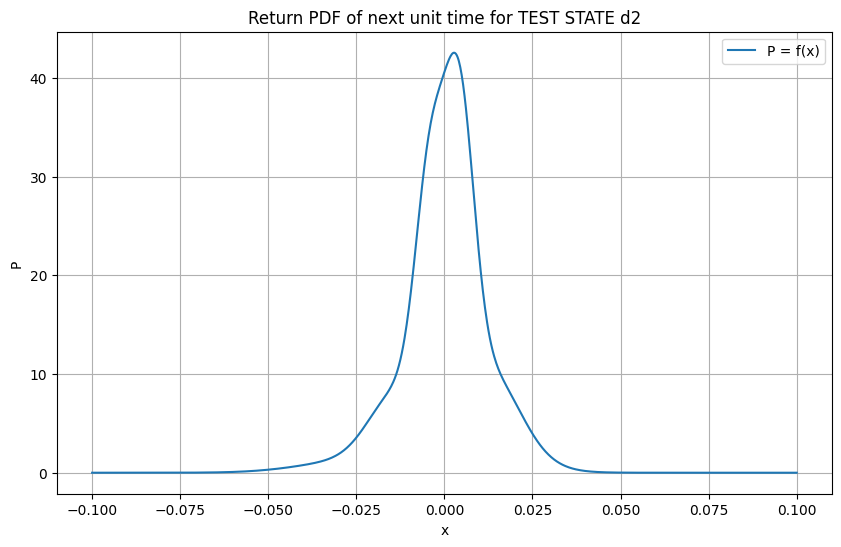

(0.5343307357593872, 2.416110314305937e-09)

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def plot_function(func, x_range=(-10, 10), num_points=1000, title="Function Plot", xlabel="x", ylabel="f(x)"):
    """
    Plots a given function over a specified range.

    Parameters:
    - func: The function to plot. It should take a single argument (x).
    - x_range: A tuple specifying the range of x values (min, max).
    - num_points: The number of points to plot.
    - title: The title of the plot.
    - xlabel: The label for the x-axis.
    - ylabel: The label for the y-axis.
    """
    x = np.linspace(x_range[0], x_range[1], num_points)
    y = [func(ele) for ele in x]

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=f'{ylabel} = f({xlabel})')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_function(return_pdf, x_range=(-0.1, 0.1), title=f"Return PDF of next unit time for TEST STATE {TEST_STATE}", xlabel="x", ylabel="P")
quad(return_pdf, 0, np.inf)

In [65]:



return_pdf = next_unit_time_return_pdf['g2']
multiplier = find_multiplier_modify_pdf(return_pdf, MIN, MAX)
f = lambda r: multiplier * return_pdf(r) if MIN <= r <= MAX else return_pdf(r)
expectation = lambda r: r * f(r) if r <= 0 else 100 * r * f(r)
val1, _, val2, _ = quad(expectation, -1, 0) + quad(expectation, 0, 10)
total = val1 + val2
should_be_equal, _ = quad(expectation, -1, 10)
total - should_be_equal

0.7639522971537861

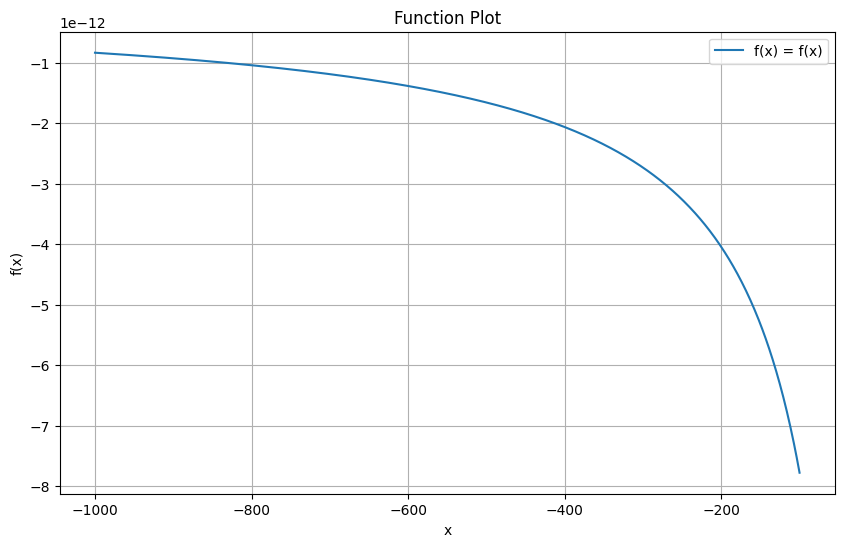

In [50]:
g = lambda S: integral_function_abstract(S, f)
plot_function(g, x_range=(-1000, -100))

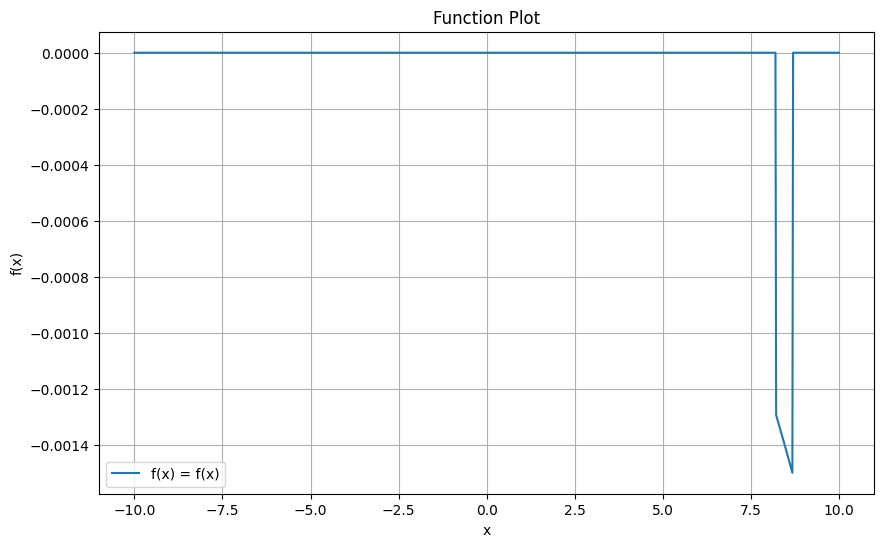

In [115]:
f = lambda S: integral_function_abstract(S, next_unit_time_return_pdf['d4'])
plot_function(f, x_range=(-10, 10))

In [117]:
f(8)

-1.244914541134555e-09

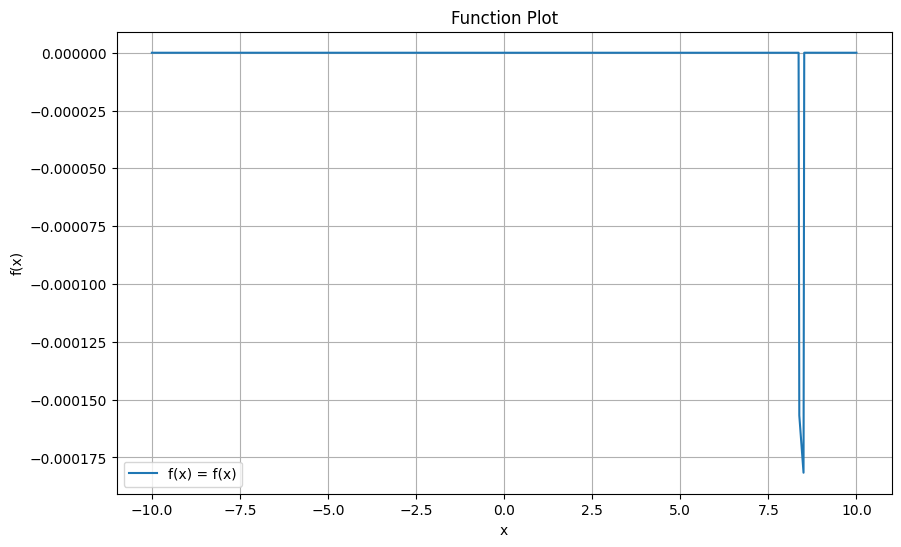

In [116]:
quad(return_pdf, 0, np.inf)
f = lambda S: integral_function_abstract(S, next_unit_time_return_pdf['d3'])
plot_function(f, x_range=(-10, 10), y_range)

/var/folders/cj/bm5yf47x4_q7ss8q04sp_hg40000gn/T/ipykernel_76430/1155937924.py:51: RuntimeWarning: divide by zero encountered in scalar divide
  return return_pdf(x) * x / (1 + S * x)
/var/folders/cj/bm5yf47x4_q7ss8q04sp_hg40000gn/T/ipykernel_76430/1155937924.py:53: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  result, error = quad(integrand, minimum_return, maximum_return)


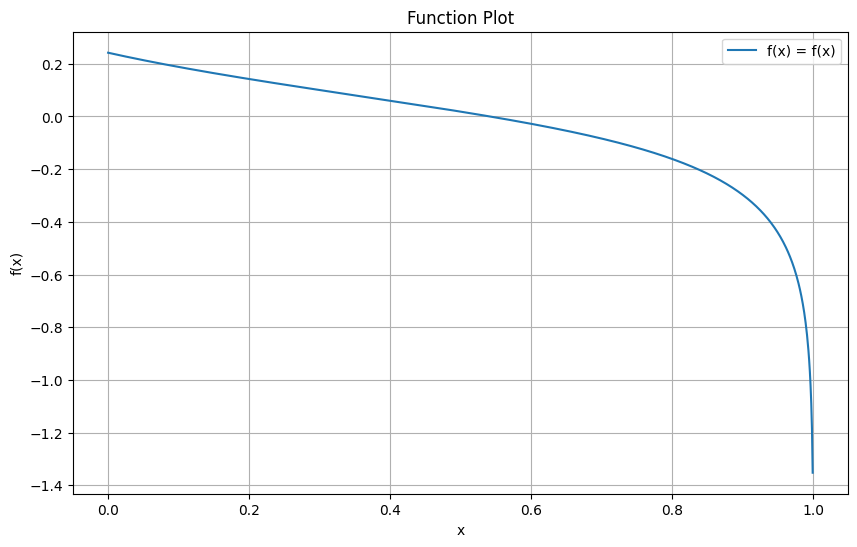

In [61]:
f = lambda x: integral_function_abstract(x, example_return_pdf)
plot_function(f, x_range=(0, 1))

In [127]:
# Testing with S = 1 for debugging
"""
Original:

def integral_function_abstract(S, return_pdf, maximum_return=10):

Computes the integral of p(x) * x / (1 + S * x) over the range [minimum_return, maximum_return].

Parameters:
- S: The Kelly bet fraction.
- return_pdf: The probability density function of returns.
- maximum_return: The upper limit for integration.

Returns:
- result: The value of the integral.

# if not 0 <= S <= 1:
    # return 0
minimum_return = -1  # Adjust as necessary for your distribution

def integrand(x):
    return return_pdf(x) * x / (1 + S * x)

result, error = quad(integrand, minimum_return, maximum_return)

return result
"""


def testing_integrand(return_pdf):
    def return_adj_pdf(x):
        return return_pdf(x) * x / (1 + 0.8 * x)
    return return_adj_pdf

quad(testing_integrand(return_pdf), -1, np.inf)

(7.947672981540276e-05, 6.4427838939275835e-09)

In [10]:
from Markov_Strategies.Markov_Strategy import MarkovStrategy
"""
TODO: Generate a strategy for each fitted return distribution with the Kelly Optimal Bet.
Run it through backtester, wallah!!

Assumes:
Have a dictionary of states & the next bet corresponding
"""
# Modify later.
kelly_dict = None
buying_states = []
wagers = []
for state in possible_states:
    if kelly_dict[state] is not None:
        buying_states.append(state)
        wagers.append(kelly_dict[state])
strategy = MarkovStrategy(buying_states, wagers)

(0.6587803232841879, 1.5493340961127525e-13)

In [ ]:
# Backtest above strategy
from Backtester.Markov_Backtester import MarkovBacktester
backtester = MarkovBacktester(data, strategy)
report = backtester.backtest_on_strategy(None)

In [3]:
ticker = 'SPY'
scraper = YFScraper()
vol_state_col = 'state_v'
data = retrieve_data_and_add_features('SPY', scraper, start='2010-01-01', end='2019-01-01')
czech_state_determiner_price = CzechStateDeterminer(k=1, l=20)
transition_probability_calculator_price = EmpiricalCalculator(czech_state_determiner_price.possible_states)
data, transition_probability_matrix = assign_states_and_calculate_transition_probabilities(data, czech_state_determiner_price, transition_probability_calculator_price)

d = get_max_1d_return(data, transition_probability_matrix, czech_state_determiner_price, macro_units=9)
d['ret']

/Users/jeremylevitt/IdeaProjects/Markov_Structured/venv/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


Assigning states . . .
Calculating transition probabilities . . .
0.9999275075184947
0.9991566343915915
1.0006923590602768
0.9999818521725526
0.999369252338286
1.0010541908587485
1.0012301539963588
1.000291296737582


2.94323

In [9]:
d['avg_ret']

1.127433466382641

In [ ]:
d[]

In [20]:
data = retrieve_data_and_add_features('SPY', scraper, start='2010-01-01', end='2019-01-01')
data = add_basic_technical_analysis_vars(data, col_to_ma='Adj Close', k=15)
czech_state_determiner_price = CzechStateDeterminer(k=1, l=20)
transition_probability_calculator_price = EmpiricalCalculator(czech_state_determiner_price.possible_states)
data, transition_probability_matrix = assign_states_and_calculate_transition_probabilities(data, czech_state_determiner_price, transition_probability_calculator_price)
get_max_1d_return(data, transition_probability_matrix, czech_state_determiner_price)

/Users/jeremylevitt/IdeaProjects/Markov_Structured/venv/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

Date
2010-01-04         NaN
2010-01-05    0.002647
2010-01-06    0.000704
2010-01-07    0.004221
2010-01-08    0.003327
                ...   
2018-12-24   -0.026423
2018-12-26    0.050525
2018-12-27    0.007677
2018-12-28   -0.001290
2018-12-31    0.008759
Name: daily_return, Length: 2264, dtype: float64
Assigning states . . .



/Users/jeremylevitt/IdeaProjects/Markov_Structured/Markov_State_Determiners/Czech_State_Determiner.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[name] = data[self.col_to_std].rolling(window=self.l).std()
/Users/jeremylevitt/IdeaProjects/Markov_Structured/Markov_State_Determiners/Czech_State_Determiner.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[self.state_col] = state_arr


Calculating transition probabilities . . .


NameError: name 'get_max_1d_return' is not defined

In [18]:
data.head(30)

,Open,High,Low,Close,Adj Close,Volume,daily_return,volume_change,SMA_15,EMA_15,RSI_15
Date,,,,,,,,,,,
2010-01-26,109.339996,110.470001,109.040001,109.309998,84.039268,211168800,-0.004191,0.129622,86.959259,86.369225,30.035552
2010-01-27,109.169998,110.080002,108.330002,109.830002,84.439095,271863600,0.004758,0.287423,86.764493,86.127959,33.868956
2010-01-28,110.190002,110.250000,107.910004,108.570000,83.470383,316104000,-0.011472,0.162730,86.501046,85.795762,29.651585
2010-01-29,109.040001,109.800003,107.220001,107.389999,82.563148,310677600,-0.010869,-0.017167,86.152515,85.391685,26.358191
2010-02-01,108.150002,109.070000,107.500000,109.059998,83.847092,187865000,0.015551,-0.395306,85.870104,85.198611,36.972996
2010-02-02,109.260002,110.589996,108.879997,110.379997,84.861916,216327900,0.012103,0.151507,85.647146,85.156524,43.829517
2010-02-03,109.879997,110.480003,109.510002,109.830002,84.439095,172730700,-0.004982,-0.201533,85.450841,85.066845,41.799599
2010-02-04,108.980003,109.029999,106.419998,106.440002,81.832802,356715700,-0.030866,1.065155,85.031580,84.662590,32.008925
2010-02-05,106.559998,106.879997,104.580002,106.660004,82.001923,493585800,0.002067,0.383695,84.607705,84.330007,33.098392


In [19]:
import numpy as np
print(np.mean(data['RSI_15']))
np.std(data['RSI_15'])

55.991192154255096


11.058379286681845

In [ ]:
czech_state_determiner_volume = CzechStateDeterminer(k=1, l=20, col_to_std='volume_change', state_col=vol_state_col)
czech_state_determiner_price = CzechStateDeterminer(k=1, l=20)
# Look into condensing the trans prob matrices into a list.
transition_probability_calculator_price = EmpiricalCalculator(czech_state_determiner_price.possible_states)
transition_probability_calculator_volume = EmpiricalCalculator(czech_state_determiner_volume.possible_states, state_col=vol_state_col)
data = retrieve_data_and_add_features(ticker, scraper, start='2010-01-01', end='2024-01-01')
data, price_transition_prob_matrix = assign_states_and_calculate_transition_probabilities(data, czech_state_determiner_price, transition_probability_calculator_price)
data, volume_transition_prob_matrix = assign_states_and_calculate_transition_probabilities(data, czech_state_determiner_volume, transition_probability_calculator_volume)

In [4]:
price_transition_prob_matrix['d2']

g4    0.000000
g3    0.031161
g2    0.184136
d4    0.002833
g1    0.325779
d3    0.050992
d2    0.130312
d1    0.274788
Name: d2, dtype: float64

In [4]:
from Markov_Strategy_Determiner.GeometricMeanProbabilityOptimizer import GeometricMeanProbabilityOptimizer
col_to_optimize = 'daily_return'
threshold = 1
optimizer = GeometricMeanProbabilityOptimizer(data, price_transition_prob_matrix,
                                  czech_state_determiner_price.possible_states, czech_state_determiner_price.possible_states, col_to_optimize, threshold, state_before_col='state', state_after_col='state')
optimizer.determine_optimal_strategy()

1.0001986085760886
0.999079787742944
1.0006896322865506
0.9996369457490238
1.0025407118947833
1.0014130897898157
1.0019949603689053
1.0006374294959852


['d2', 'g1', 'd3', 'g4', 'd4', 'd1']